In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from activation_distribution_tool import acts_and_imgs, sort_acts_and_imgs, act_distribution
from activations_tool import model, get_layer
from PIL import Image
import torchvision
import torch
from torchvision import transforms
import pickle
import random
import time

# ImageNet Handling

In [14]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

imagenet_data = torchvision.datasets.ImageNet('../../seri/datasets/imagenet', transform=transform)
data_loader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=16)

# Constants

In [13]:
layer1 = get_layer(4, 2, 5)
layer2 = get_layer(4, 1, 6)
channel, stdBucketWidth, stdActLower, numBuckets, minExamples, maxExamples, numImages = 1052, .5, -16, 64, 3, 100, 32

# Get Sorted Images

In [15]:
actsAndImgs = acts_and_imgs(data_loader, layer, channel, numImages)
sortedImages = sort_acts_and_imgs(actsAndImgs, data_loader, layer, channel, stdBucketWidth, stdActLower, numBuckets, minExamples, maxExamples)

# Save Sorted Images

In [16]:
# with open('filename.sortedImages', 'wb') as handle:
#     pickle.dump(sortedImages, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.actsAndImgs', 'wb') as handle:
#     pickle.dump(actsAndImgs, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load saved object as "b"
# with open('filename.sortedImages', 'rb') as handle:
#     b = pickle.load(handle)

# Random Human Sort (for testing)

In [17]:
'''
img_3_5_6_5 = Image.open('datasets/test_images/3_5_6_5.png')
img_4_2_6_2 = Image.open('datasets/test_images/4_2_6_2.png')
img_4_2_6_202 = Image.open('datasets/test_images/4_2_6_202.png')
img_2_1_1_9 = Image.open('datasets/test_images/2_1_1_9.png')
img_4_2_1_13 = Image.open('datasets/test_images/4_2_1_13.png')
img_4_2_6_1642 = Image.open('datasets/test_images/4_2_6_1642.png')
img_4_2_6_11 = Image.open('datasets/test_images/4_2_6_11.png')
img_4_2_5_1138 = Image.open('datasets/test_images/4_2_5_1138.png')


sortedImages = {1.0:[img_3_5_6_5, img_4_2_6_2, img_4_2_6_202], 2.0: [img_2_1_1_9, img_4_2_1_13, img_4_2_6_1642]}
humanSort = {"one":[img_3_5_6_5, img_4_2_6_2, img_4_2_6_202], "two": [img_2_1_1_9, img_4_2_1_13, img_4_2_6_1642]}
'''

images = [i for (a, i) in actsAndImgs]
random.shuffle(images)
numLabels = 5
humanSort = {}
catSize = int(len(images) / numLabels)
for i in range(numLabels):
    humanSort.update({i:images[i*catSize:(i+1)*catSize]})

# Conditional Probability Plot

{0: [0.16, 0, 0, 1.0, 0.5, 0], 1: [0.2, 0, 1.0, 0, 0, 0], 2: [0.24, 0, 0, 0, 0, 0], 3: [0.24, 0, 0, 0, 0, 0], 4: [0.12, 0.5, 0, 0, 0.5, 1.0]}
{(-0.25, 3): [<PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0441C10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF40928D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0441A10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0434D50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0441290>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF043A650>], (-0.25, 2): [<PIL.Image.Image image mode=RGB size=224x224 at 0x7FDF96082A50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0438AD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF408B350>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0436450>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0434110>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF043A390>], (-0.25, 1): [<PIL.Image.Image image mode=RGB size

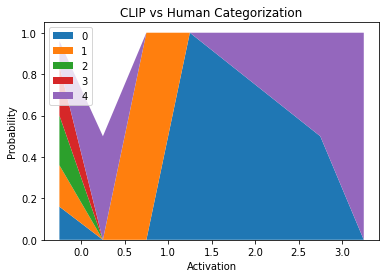

In [18]:
start = time.time()
distribution = act_distribution(sortedImages, humanSort)
labels = range(numLabels)
activations = []
for (a, l) in distribution.keys():
    if a not in activations:
        activations.append(a)
activations = sorted(activations)
probabilities = {} #dictionary from label to list of probabilities (indexed by activation)

for l in labels:
    probabilities.update({l:[]})
    
for a in activations:
    for l in labels:
        list1 = probabilities[l]
        p = 0
        if (a, l) in distribution.keys():
            p = len(distribution[a, l]) / len(sortedImages[a])
        list1.append(p)
        probabilities.update({l:list1})

#print(actsAndImgs)
#print("******")
print(probabilities)
#print('*******')
#print(sortedImages)
#print('*******')
#print(humanSort)
#print("******")
print(distribution)
#print("******")
#print(activations)


fig, ax = plt.subplots()
ax.stackplot(activations, probabilities.values(),
             labels=probabilities.keys())
ax.legend(loc='upper left')
ax.set_title('CLIP vs Human Categorization')
ax.set_xlabel('Activation')
ax.set_ylabel('Probability')
end = time.time()
print(end - start)

plt.show()

In [19]:
print(sortedImages)

{-15.75: [], -15.25: [], -14.75: [], -14.25: [], -13.75: [], -13.25: [], -12.75: [], -12.25: [], -11.75: [], -11.25: [], -10.75: [], -10.25: [], -9.75: [], -9.25: [], -8.75: [], -8.25: [], -7.75: [], -7.25: [], -6.75: [], -6.25: [], -5.75: [], -5.25: [], -4.75: [], -4.25: [], -3.75: [], -3.25: [], -2.75: [], -2.25: [], -1.75: [], -1.25: [], -0.75: [], -0.25: [<PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0441C10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDF96082A50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0438AD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF40928D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0434D10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF408BFD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF0441990>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF04396D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDEF043E550>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FD